In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

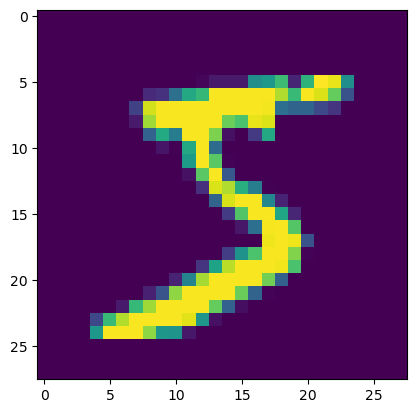

In [3]:
plt.imshow(X_train[0])

In [4]:
X_train = X_train / 255

In [5]:
X_test = X_test / 255

In [11]:
layers = tf.keras.layers
models = tf.keras.models
optimizers = tf.keras.optimizers

In [12]:
28*28

784

In [13]:
784 / 2

392.0

In [14]:
X_train[0].shape

(28, 28)

In [15]:
encoder = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(units=400, activation='relu'),
    layers.Dense(units=200, activation='relu'),
    layers.Dense(units=100, activation='relu'),
    layers.Dense(units=50, activation='relu'),
    layers.Dense(units=25, activation='relu')
])

In [20]:
decoder = models.Sequential([
    layers.Dense(units=50, activation='relu', input_shape=[25]),
    layers.Dense(units=100, activation='relu'),
    layers.Dense(units=200, activation='relu'),
    layers.Dense(units=400, activation='relu'),
    layers.Dense(units=784, activation='sigmoid'),
    layers.Reshape([28,28])
])

In [21]:
autoencoder = models.Sequential([encoder, decoder])

In [22]:
autoencoder.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(learning_rate=1.5), metrics=['accuracy'])

In [23]:
autoencoder.fit(X_train, X_train, epochs=5, validation_data=(X_test, X_test))

Epoch 1/5


1875/1875 [==============================] - 18s 8ms/step - loss: 0.2504 - accuracy: 0.0903 - val_loss: 0.2125 - val_accuracy: 0.1323
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1879 - accuracy: 0.1596 - val_loss: 0.1657 - val_accuracy: 0.1875
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1602 - accuracy: 0.2002 - val_loss: 0.1541 - val_accuracy: 0.2100
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1488 - accuracy: 0.2139 - val_loss: 0.1494 - val_accuracy: 0.2125
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1404 - accuracy: 0.2232 - val_loss: 0.1342 - val_accuracy: 0.2244


In [25]:
passed_images = autoencoder.predict(X_test[:10])

1/1 [==============================] - 0s 227ms/step


Original image


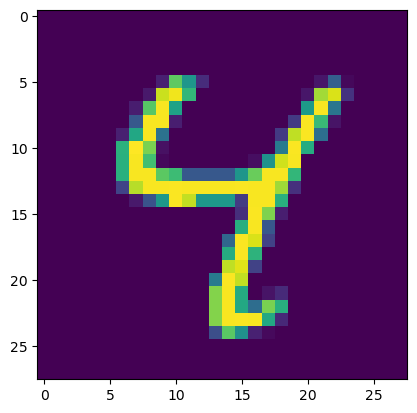

Coded image ( After )


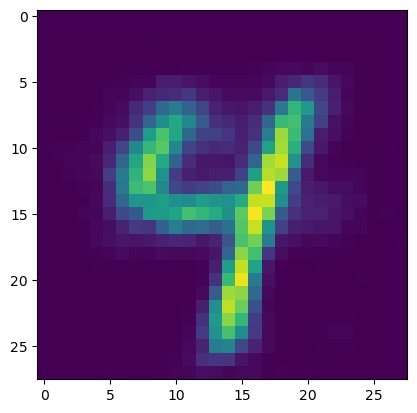

In [33]:
n = 6
print('Original image')
plt.imshow(X_test[n])
plt.show()
print('Coded image ( After )')
plt.imshow(passed_images[n])
plt.show()

In [29]:
sample = layers.GaussianNoise(0.2)

In [31]:
noisey = sample(X_test[:10], training=True)

Original


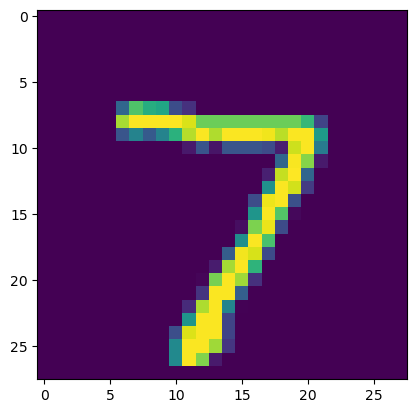

Noisy


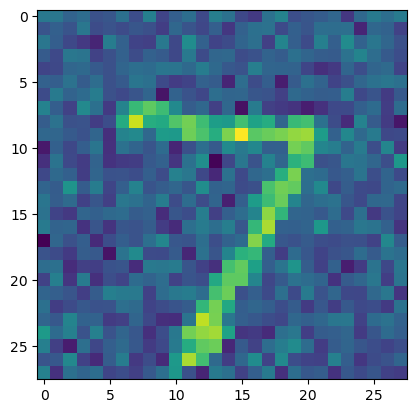

In [34]:
n = 0
print('Original')
plt.imshow(X_test[n])
plt.show()
print('Noisy')
plt.imshow(noisey[n])
plt.show()

In [35]:
tf.random.set_seed(101)
np.random.seed(101)

encoder = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.GaussianNoise(0.2),
    layers.Dense(units=400, activation='relu'),
    layers.Dense(units=200, activation='relu'),
    layers.Dense(units=100, activation='relu'),
    layers.Dense(units=50, activation='relu'),
    layers.Dense(units=25, activation='relu')
])

In [36]:
decoder = models.Sequential([
    layers.Dense(units=50, activation='relu', input_shape=[25]),
    layers.Dense(units=100, activation='relu'),
    layers.Dense(units=200, activation='relu'),
    layers.Dense(units=400, activation='relu'),
    layers.Dense(units=784, activation='sigmoid'),
    layers.Reshape([28,28])
])

In [37]:
noise_remover = models.Sequential([encoder, decoder])

In [40]:
noise_remover.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
noise_remover.fit(X_train, X_train, epochs=8, validation_data=[X_test, X_test])

Epoch 1/8
1875/1875 [==============================] - 36s 18ms/step - loss: 0.1749 - accuracy: 0.1787 - val_loss: 0.1354 - val_accuracy: 0.2307
Epoch 2/8
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1290 - accuracy: 0.2354 - val_loss: 0.1199 - val_accuracy: 0.2418
Epoch 3/8
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1202 - accuracy: 0.2501 - val_loss: 0.1138 - val_accuracy: 0.2540
Epoch 4/8
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1156 - accuracy: 0.2582 - val_loss: 0.1101 - val_accuracy: 0.2693
Epoch 5/8
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1130 - accuracy: 0.2655 - val_loss: 0.1083 - val_accuracy: 0.2692
Epoch 6/8
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1107 - accuracy: 0.2677 - val_loss: 0.1074 - val_accuracy: 0.2729
Epoch 7/8
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1085 - accuracy: 0.2721 - val_loss: 0.1038 - val_ac

In [42]:
ten_noisy_images = sample(X_test[:10], training=True)

In [43]:
denoised = noise_remover(ten_noisy_images)

ORIGINAL IMAGE


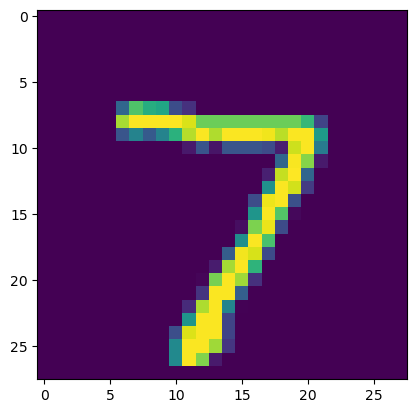

NOISE ADDED IMAGE


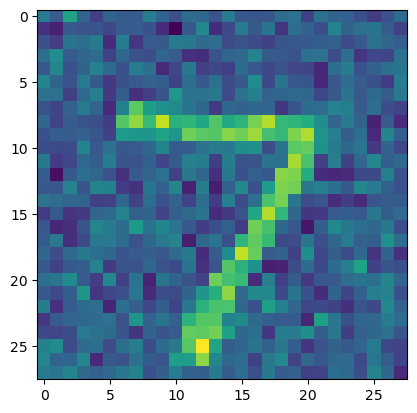

NOISE REMOVED IMAGE


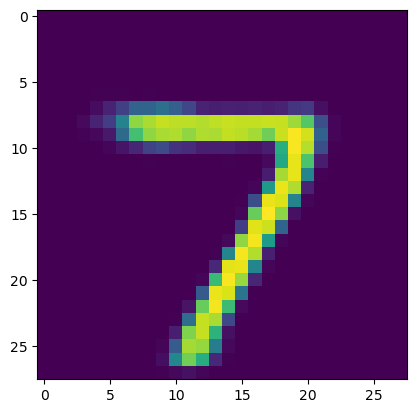

In [60]:
n = 0
print('ORIGINAL IMAGE')
plt.imshow(X_test[n])
plt.show()
print('NOISE ADDED IMAGE')
plt.imshow(ten_noisy_images[n])
plt.show()
print('NOISE REMOVED IMAGE')
plt.imshow(denoised[n])
plt.show()